In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
xtr = np.load("data/X_part1.npy")
xcv = np.load("data/X_val_part1.npy")
ycv = np.load('data/y_val_part1.npy')

In [3]:
print(f"Training Set: {xtr[:2]}")
print(f"Validation X Set: {xcv[:2]}")
print(f"Validation Y Set: {ycv[:2]}")

Training Set: [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]]
Validation X Set: [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]]
Validation Y Set: [0 0]


In [4]:
print(xtr.shape, xcv.shape, ycv.shape)

(307, 2) (307, 2) (307,)


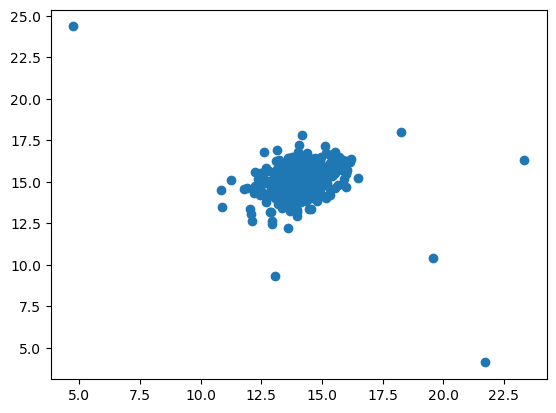

In [5]:
plt.scatter(xtr[:, 0], xtr[:, 1])
plt.show()

In [6]:
xtr[0] / 307

array([0.04249777, 0.04801678])

In [7]:
def estimate_gaussian(x):
    m = x.shape[0]
    mu = np.sum(x , axis=0) / m
    var = np.sum((x-mu)**2 , axis=0) / m
    return mu, var

In [8]:
mu, var = estimate_gaussian(xtr)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


In [9]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [10]:
p_val = multivariate_gaussian(xtr, mu, var)

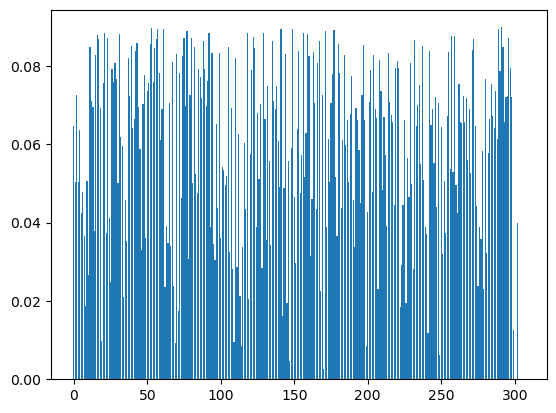

In [11]:
plt.bar(range(307), p_val)
plt.show()

In [12]:
def select_threshold(y, p):
    best_threshold = 0
    best_f1 = 0
    f1 = 0

    step = (max(p) - min(p)) / 1000

    for threshold in np.arange(min(p), max(p), step):
        pred = p < threshold

        tp = sum((pred==1) & (y==1))
        fp = sum((pred==1) & (y==0))
        fn = sum((pred==0) & (y==1))
        if tp + fp == 0 or tp + fn == 0:
            continue
        prec = tp/ (tp+fp)
        rec = tp / (tp+fn)
        if prec + rec == 0:
            continue
        f1 = (2*prec*rec) / (prec+rec)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

In [13]:
epsilon, F1 = select_threshold(ycv, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 8.986095e-05
Best F1 on Cross Validation Set: 0.800000


In [14]:
X_train_high = np.load("data/X_part2.npy")
X_val_high = np.load("data/X_val_part2.npy")
y_val_high = np.load("data/y_val_part2.npy")

In [15]:
mu_high, var_high = estimate_gaussian(X_train_high)

# Evaluate the probabilites for the training set
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# Evaluate the probabilites for the cross validation set
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# Find the best threshold
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print('Best epsilon found using cross-validation: %e'% epsilon_high)
print('Best F1 on Cross Validation Set:  %f'% F1_high)
print('# Anomalies found: %d'% sum(p_high < epsilon_high))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117
